# 12-2. 없던 데이터를 만들어낸다, 생성 모델링

기본적인 딥러닝 모겔과 다른 생성 모델링  
말 그래도 데이터를 생성하는 것이 목표  
ex) DeepComposer

# 12-3. 여러 가지 생성 모델링 기법과 친해지기 (1) Pix2Pix

image 관련 응용 생성 모델 기법을 살짝 둘러보자  

## 그림을 사진으로 변환해 보자: Pix2Pix

간단한 이미지 -> 실제 사진처럼 바꿔줄 때 사용하는 모델  
이미지(Input Image) 와 실제 이미지(Ground Truth) 가 쌍을 이루는 데이터셋으로 학습  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/pix2pix.max-800x600.png)

**Pix2Pix의 응용 사례?**  

>스케치로 그려진 그림을 실사화하기  
흑백 사진을 컬러로 변환하기  
위성사진을 지도 이미지로 변환하기  
낮에 찍힌 사진을 밤 배경의 사진으로 변환하기  


# 12-4. 여러 가지 생성 모델링 기법과 친해지기 (2) CycleGAN

Pix2Pix이후 발전된 모델은 CycleGAN   
Pix2Pix와 비슷해 보이지만 한 방향으로만 변환이 가능한 것과
양방향으로 이미지 변환이 가능  
이미지 <-> 그림, 쌍방으로 가능  
그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요 없슴  
쌍을 이루지 않더라도 그냥 얼룩말이 있는 사진과말이 있는 사진 각각의 데이터 셋만 있다면 CycleGAN을 학습시킬 수 있다  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/CycleGAN.max-800x600.png)

# 12-5. 여러 가지 생성 모델링 기법과 친해지기 (3) Neural Style Transfer

## 사진에 내가 원하는 스타일을 입혀보자: Neural Style Transfer

스타일을 변환시킨다  
Neural이 붙었으니 딥러닝 기술을 이용했다는 것  
base image + style image를 하면 결과를 낸다  
즉, Base Image에서는 Content(내용)만, 그리고 Style Image에서는 Style(스타일)만 추출해서 합친 결과물  


# 12-6. 패션을 디자인하려면? 먼저 패션을 배워야지! (1)

## Fashion MNIST

오늘 우리가 사용할 데이터셋은 Fashion MNIST  
이미지 크기 = 28x28 grayscale image  
데이터셋은 총 몇 장 = training set 60,000장 + test set 10,000장  
label? = 10개의 카테고리로 이루어져 있고 0~9의 숫자로 표시되어있다.  
  
**Fashion MNIST가 만들어진 이유 세 가지는 무엇인가요?**  
MNIST가 너무  쉽고  
많이 쓰였고   
현대 CV 과제를 표현할 수 없다  

# 2-7. 패션을 디자인하려면? 먼저 패션을 배워야지! (2) 코드로 살펴보기

## 전처리 

```
! pip install imageio
! pip install Pillow
! mkdir -p ~/aiffel/dcgan_newimage/fashion/generated_samples
! mkdir -p ~/aiffel/dcgan_newimage/fashion/training_checkpoints
! mkdir -p ~/aiffel/dcgan_newimage/fashion/training_history
```

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.2.0


데이터셋이 이미 tf.keras에 들어가 있기 때문에 꺼내기만 하면 된다  
  
근데 이번에는 분류문제가 아니기 때문에 라벨이 필요가 없다  
언더바로 라벨 데이터를 무시하겠음

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [4]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
test_x.shape

(10000, 28, 28)

자 여기서 추가할 것이 있는데,  
앞서 CNN(합성곱) 계층을 다룰 때 배웠듯, 딥러닝에서 이미지를 다루려면 채널 수에 대한 차원이 필요  
Fashion MNIST 데이터는 흑백 이미지이므로, 채널 값은 1  
데이터셋의 shape 마지막에 1을 추가해줘야 함  

In [7]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

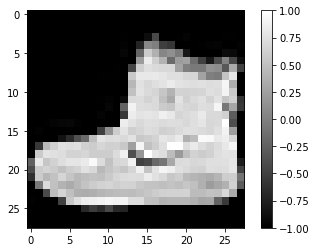

In [8]:
# 데이터 확인하기  
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

plt.colorbar() 를 이용해 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인  
픽셀에는 우리가 정규화 해준 대로 -1 ~ 1 사이의 값을 가지고, -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시됨  
열개정도 확인해보기 


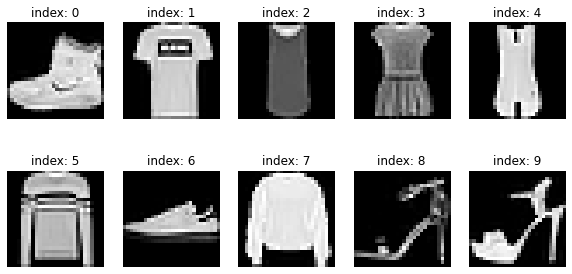

In [9]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))는 이미지의 전체 프레임의 크기를 결정  
여러 개의 이미지를 한 번에 띄우고 싶을 때에는 plt.subplot(row, col, index)  
plt.title(f'index: {i}') 함수를 이용해서 이미지에 제목으로 라벨값 **f 추가 공부 필요**  
plt.axis('off') 함수로 불필요한 축을 지움  
  
**for 문을 활용해서 이미지 25개를 5x5 의 배열로 띄워보세요. 단, 모든 이미지는 train_images에서 랜덤으로 추출해 보세요. (힌트 : numpy에서 랜덤으로 정수를 추출해주는 함수를 찾아보세요!)**

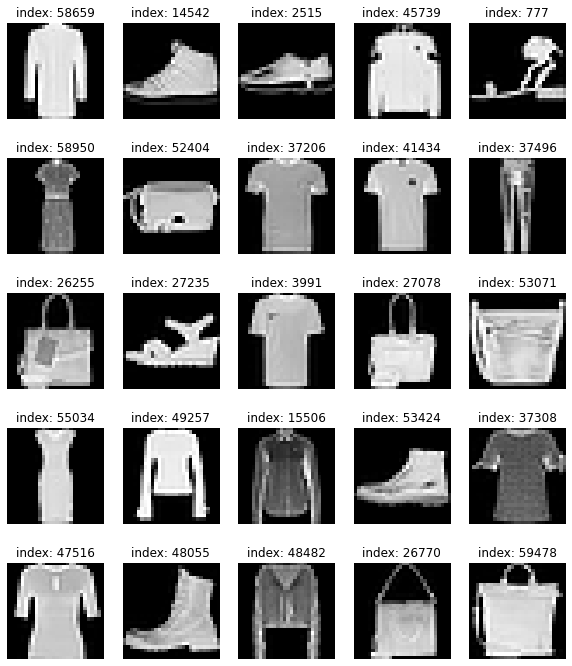

In [10]:
plt.figure(figsize=(10, 12))

for i in range(25):
    # [[my CODE]]
    rand = np.random.randint(60000)
    plt.subplot(5, 5, i+1)
    plt.imshow(train_x[rand].reshape(28, 28), cmap='gray')
    plt.title(f'index: {rand}')
    plt.axis('off')

plt.show()

## dataset 이용

정리된 데이터를 곧 모델에 넣어서 학습시켜야 하니, 편하게 사용할 수 있도록 텐서플로우의 Dataset을 이용해 준비해 놓도록 하겠습니다. 이를 이용하면 우리가 매번 모델에게 직접 섞어서 넣어주지 않아도 됩니다. 어떻게 사용하는지는 곧 보도록 하죠.

In [11]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

BUFFER_SIZE은 전체 데이터를 섞기 위해 60,000으로 설정  
BATCH_SIZE는 모델이 한 번에 학습할 데이터의 양  
적절한 사이즈로 잘라서 학습을 진행 = 미니배치 학습  
  
아래 나올  
shuffle() 함수는 데이터셋을 잘 섞어서 모델에 넣어줄 것  

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다  
train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 합니다.  
데이터가 잘 섞이게 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋습니다.

# 12-8. 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (1) GAN 이해하기

## GAN

GAN에는 두 가지 네트워크가 있음  
생성자 & 판별자  
이 두 네트워크 성장요인은 서로 경쟁하듯 이루어진 모델의 구조 때문이고,  
덕분에 적대적인(Adversarial)이 들어가게 된다.
![](https://aiffelstaticprd.blob.core.windows.net/media/images/GAN.max-800x600.png)

**GAN 중 특히 합성곱 층(Convolutional Layer)으로 이루어진 딥러닝 모델을 DCGAN (Deep Convolutional GAN) 이라고 합니다. 본 글에서 설명한 DCGAN은 무엇을 입력받아 무엇을 출력하나요?**  
>균등 분포 에서 추출한 100 개의 난수를 입력   
64x64x3 이미지 출력  
  
**글에서는 GAN을 포함해 총 세 가지의 생성 모델링 기법을 소개하였습니다. 나머지 두 가지는 무엇인가요?**  
> **VAE** (Variational Autoencoder)를 사용 하면 데이터의 로그 가능성에 대한 하한 을 최대화하는 확률 적 그래픽 모델 프레임 워크에서이 문제를 공식화 할 수 있습니다.    
 **PixelRNN** 과 같은 자기 회귀 모델은 대신 이전 픽셀 (왼쪽 및 상단)이 제공된 모든 개별 픽셀의 조건부 분포를 모델링하는 네트워크를 훈련 시킵니다.


# 12-9. 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (2) 생성자 구현하기

## DCGAN(Deep Convolutional GAN)

GAN에서 더 발전 시킨 모델로 훨씬 그럴듯한 고화질 이미지 생성을 이루어낸다  
  
모델 구현은 Keras Sequential API를 활용해서 한다  

In [13]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

make_generator_model이라는 함수를 만들어서 언제든 생성자를 생성할 수 있도록  
  
**함수 내부**  
* tf.keras.Sequential()로 모델을 시작한 후 레이어를 차곡차곡 쌓아줌    
* Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층  
* 세 번의 Conv2DTranspose 층을 이용해 (7, 7, 256) → (14, 14, 64) → (28, 28, 1) 순으로 이미지를 키워나간다  
* 여기서 최종 사이즈인 (28, 28, 1)은 우리가 준비했던 데이터셋과 형상이 동일  
* BatchNormalization 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화  
* 중간층들의 활성화 함수는 모두 LeakyReLU를 사용  
* 마지막 층에는 활성화 함수로 tanh를 사용하는데, 이는 우리가 -1 ~ 1 이내의 값으로 픽셀값을 정규화시켰던 데이터셋과 동일하게 하기 위함

**생성자의 입력 벡터는 어떤 형태입니까?**
>모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받습니다.  
  


**처음 입력된 벡터는 어떤 레이어를 지나며, 첫 레이어를 지난 후의 shape는 어떤 형태입니까?**  
>(batch_size, 100) 벡터 -> 7 x 7 x 256 = 12544개의 노드를 가진 첫 번째 Dense 레이어 -> (batch_size, 12544) 형상의 벡터  
  
  

**첫 번째 레이어를 지난 후 벡터는 어떤 층을 지나게 됩니까? 이 레이어는 왜 필요합니까?**  
>Reshape layer  
차원 벡터를 (7, 7, 256) 형상의 3차원 벡터로 변환하기 위해서  
  


generator라는 변수로 생성하고, 모델 세부 내용인 summary를 출력

In [14]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

자 그럼, shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 한번 만들어 보도록 하자  
그런데 아직 모델이 학습되지 않았으니, 아마 결과물도 큰 의미가 있지는 않을 것입니다.  
tf.random.normal을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들 수 있습니다.  

In [15]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.3450478 ,  0.37213138, -0.69001913, -0.50160855,  0.42884701,
        -0.20874096,  0.59280777, -1.1610926 ,  0.20868519,  1.6941682 ,
         0.01588425, -0.71565783, -0.86772925,  0.31107372, -0.40588453,
        -0.50936943, -1.0665622 ,  0.26854426,  0.9143027 , -1.0305831 ,
        -1.9380825 , -1.7306722 ,  0.1757376 ,  0.4446266 ,  0.4835339 ,
        -0.22284374, -1.3623956 , -0.35976052,  0.33685538,  1.2213093 ,
        -0.664024  ,  0.74545914,  0.6131269 , -1.4186113 ,  0.73163915,
         0.32794926,  0.02207472,  0.6758093 ,  0.27760145, -0.5601729 ,
         2.8499942 , -0.37053484, -0.23273166, -0.784075  ,  0.12146686,
        -1.3147465 ,  0.46434078,  0.53491366,  0.12584798,  0.04311616,
         0.09142485,  1.0884669 ,  0.8943562 , -2.884203  ,  0.11215702,
        -0.6918397 ,  1.1512269 ,  2.2391002 , -0.8669941 , -2.095368  ,
        -1.0214189 , -0.61339676,  1.5991907 , -1.2825524 ,  0.0922675 ,
 

지금은 학습하는 중이 아니니 training=False를 설정해 주어야 함  
Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 training=False을 주어야 올바른 결과를 얻을 수 있습니다.  

In [16]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

첫 번째 1은 1개(batch_size=1)라는 뜻을, 그 뒤로는 (28, 28, 1) 사이즈 이미지가 생성되었다는 뜻  
이를 시각화 해보자  
matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있으므로 0번째와 3번째 축의 인덱스를 0으로 설정해서 (28, 28) shape의 이미지를 꺼낼 수 있도록 하자  

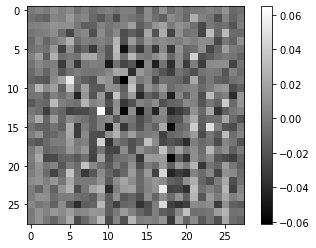

In [17]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

역시 -1과 1 사이의 값에서 적당히 잘 생성된 것을 확인할 수 있음  
트레이닝 전이어서 아무런 의미가 없는 노이즈 같은 노이즈 같은 이미지 생성  


# 12-10. 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (3) 판별자 구현하기

판별자는 '진짜라고 판단하는 정도'값을 출력해야 합니다.  
입력은 (28, 28, 1) 크기의 이미지가, 출력은 단 하나의 숫자(진짜라고 판단하는 정도)  


In [18]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

판별자도 함수로 구현함  

**함수 내부**  
* 판별자는 Conv2D 층으로 이미지의 크기를 점점 줄여나갑니다  
  첫 번째 Conv2D 층에서 입력된 \[28, 28, 1\] 사이즈의 이미지는 다음 층을 거치며 (28, 28, 1) → (14, 14, 64) → (7, 7, 128)까지  
* Flatten 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 7x7x128=6272, 즉 (1, 6272) 형상의 벡터로 변환  
* 마지막 Dense Layer를 거쳐 단 하나의 값을 출력

In [19]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [20]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00065556]], dtype=float32)>

텐서플로우의 텐서 형태로 출력 됨

# 12-11. 생성 모델이 똑똑해지기 위한 기나긴 여정 (1) 손실함수와 최적화 함수

자 이제 학습 시켜볼까  
딥러닝 모델이 학습하기 위해서 꼭 필요한 두 가지는, 바로 손실함수(loss function)와 최적화 함수(optimizer)죠.  

## 손실함수(loss function)

GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용  
교차 엔트로피는 앞서 분류 모델을 설계할 때 많이 사용했던 손실함수  
-> 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 많이 쓰인다  
특히 판별자는 한 개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피(binary cross entropy)를 사용할 것  
  
**다시 한번 정리**  
생성자는 자기가 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이고 싶어 합니다. 판별자는 생성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것이 목표  
***
그렇다면 Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표하는 결과는 다음과 같겠죠.  

>생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것  
판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것  
=> 결국 생성자든 구분자든, 결국 손실함수에 들어가는 값은 모두 판별자의 판별값

***
교차 엔트로피 함수는 tf.keras.losses 라이브러리 안에 있음   
다만,  판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh 함수와 같은 활성화 함수가 없었습니다. 즉, 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있다  
  
그런데 tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정합니다 .  
(Using from_logits=True may be more numerically stable.=안정적이다)     
따라서 from_logits를 True로 설정해 주어야 BinaryCrossEntropy에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산할 수 있습니다.

In [21]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

cross_entropy를 활용해 계산할 loss들은 fake_output와 real_output, 두 가지를 활용합니다.  
>fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)  
real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)  

그럼 이제, fake_output과 real_output을 각각 1 또는 0에 비교를 해야 하는데, 어떻게 비교할 수 있을까요?  
=> tf.ones_like()와 tf.zeros_like() 함수를 활용하면 된다  
-> 이 함수들은 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용  
실험을 해보자

In [22]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector) # 다 똑같은데 내용물은 1인

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [23]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.zeros_like(vector) # 다 똑같은데 내용물은 0인

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)>

### generator_loss

generator_loss는 fake_output가 1(real)에 가까워지기를 바라므로, 다음과 같이 tf.ones_like와의 교차 엔트로피값을 계산하면 됩니다.  
cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값  
=> fake ouuput에서는 cross_entropy가 작은 값을 가져야 성능이 좋음

In [24]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### discriminator_loss

discriminator_loss는 real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바람  
real_output은 1로 채워진 벡터와, fake_output은 0으로 채워진 벡터와 비교  
-> 최종 discriminator_loss 값은 이 둘을 더한 값

In [25]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### discriminator accuracy

real output, fake output을 얼마나 정확히 판별하는지 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용  
real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적입니다.   
fake accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻입니다.

In [26]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

예를 들어 위의 코드를 설명  
ex.) real_output = tf.Tensor(\[0.2, 0.4, 0.7, 0.9]) 라면,

(1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별
> tf.Tensor([False, False, True, True])

(2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환
> tf.Tensor([0.0, 0.0, 1.0, 1.0])

(3) tf.reduce_mean( (2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산
> 0.5


## 최적화 함수(optimizer)

Adam 최적화 기법을 활용  
Adam 함수 또한 tf.keras.optimizers 안에 있음  
하이퍼 파라미터인 "learning rate"는 0.0001로 설정할 텐데, 학습 품질을 올려보고 싶다면 여러 가지로 값을 바꾸어 가며 학습을 진행해 보는 것을 추천  
생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에 optimizer도 따로

In [27]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### 샘플 확인

매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인할 것이다  
샘플은 한 번에 16장을 생성하도록 하겠습니다.  
생성할 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있으므로, 고정된 seed 노이즈를 만들어두어야 합니다.  
즉, 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록 하겠습니다.  

In [28]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

# 12-12. 생성 모델이 똑똑해지기 위한 기나긴 여정 (2) 훈련과정 설계

## train_step 함수

하나의 미니배치 당 진행할 train_step 함수 만들기  
학습시킬 훈련 함수 위에 @tf.function 이라는 데코레이터를 붙여서  
여러 과정을 내부적으로 처리해서 더욱 편리하게 학습시킬 수 있게 해줍니다.  

In [29]:
# tf.function 이해하기  
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [30]:
# tf.function 이해하기  
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

f(x,y)의 결과 타입이 다르다  
@tf.function 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동변환

In [31]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

train_step 함수를 하나하나 뜯어보면 다음과 같습니다.

>(1) 입력데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음  
(2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함  
(3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기  
(4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성    
(5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력    
(6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산  
(7) accuracy 계산 : fake_output, real_output으로 discriminator가 판별을 잘 했는지 판단하는 정확도 (내가 붙임 ㅜ)  
(8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산  
(9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신   
(10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴  

## 샘플 확인 함수
이렇게 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들기  
고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있다  

In [32]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

model이 16개의 seed가 들어있는 sample_seeds를 입력받아서 만들어낸 prediction을 matplotlib으로 시각화해주는 과정  
-> subplot을 이용해서 총 16개의 sample을 시각화하는 과정입니다. 16개이므로 4행 4열로 나누어 subplot(4, 4, i+1)로 시각화하는 것  
  
plt에 저장되어 보여지는 이미지를 plt.savefig로 간단히 파일화 해서 저장  
  
generated_samples라는 폴더 아래에 저장하는 것이므로 try 구문을 이용해 폴더가 없는 상황에 에러가 발생하는 것을 방지합니다. 만약 폴더가 없어서 에러가 난다면, except 구문으로 들어가 os.mkdir('./generated_samples')로 폴더를 만든 후 파일을 저장할 수 있다  
  
GAN의 학습 과정은 지도학습 모델보다 까다로운데, 이것은 두 모델이 서로의 학습 과정에 영향을 주고받기 때문  
train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수를 만들어 봅시다.  
예를 들어 생성자의 loss의 history는 history\['gen_loss']로 접근할 수 있는 list로 관리할 예정  

In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

## checkpoint

tf.train.Checkpoint를 활용하면 매번 모델을 직접 저장해주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있습니다.  
네트워크가 끊긴다거나, 예상치 못한 문제로 인해 오랜 시간동안 학습한 모델을 잃지 않게 해줌  
checkpoint에는 optimizer와 생성자, 구분자를 모두 넣어 저장  
정확히는 생성자와 구분자가 학습한 모델 가중치를 저장하는 것이죠. 게임의 체크포인트처럼 우리의 학습 환경과 학습한 내용을 저장  


In [34]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# 12-13. 생성 모델이 똑똑해지기 위한 기나긴 여정 (3) 학습 시키기

한 단계를 학습하는 train_step,  
샘플 이미지를 생성하고 저장하기 위한 generate_and_save_images(),  
학습 과정을 시각화하는 draw_train_history(),  
그리고 모델까지 저장하기 위한 checkpoint  
이 모두를 한 곳에 합치기  

In [35]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

모델을 저장하는 간격을 담당하는 save_every  
전체 학습 에포크를 결정하는 EPOCHS  


In [36]:
save_every = 5
EPOCHS = 3

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

KeyboardInterrupt: 

acc가 0.5와 가까워지는 과정으로 보인다  
어쩌면 단순히 학습수행 시간만 늘리는 것보다, 모델구조나 학습 방법을 바꾸어 봐야 할 수도 있습니다. 그래프를 유심히 보면서 학습 결과가 더이상 개선되고 있지 않은지 여부를 지속적으로 살펴봅시다.

## 학습과정 시각화하기

샘플 이미지를 합쳐서 움짤로 만들어보자  
GIF 파일은 우리가 오래전에 import 해놓았던 imageio 라이브러리를 활용해 만들 수 있다  
imageio.get_writer를 활용해서 파일을 열고, 거기에 append_data로 이미지를 하나씩 붙여나가는 방식  


In [38]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif

-rw-r--r-- 1 aiffel-dj35 aiffel-dj35 366315  3월  2 08:59 /home/aiffel-dj35/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif


# 12-14.프로젝트 : CIFAR-10 이미지 생성하기

Fashion MNIST -> CIFAR-10 으로 데이터를 변경하면서 달라지는 것   
>이미지 데이터의 shape가 (28, 28, 1)에서 (32, 32, 3)으로 변경됩니다. 생성자, 판별자 모델의 입출력 shape 및 모델 구조에 영향이 있습니다.  
이미지가 단색의 grayscale에서 RGB 3채널의 컬러이미지로 변경됩니다. 시각화 과정에서 고려할 점이 있습니다.  
입력데이터 전체 차원이 3~4배 증가하면서, 학습이 진행되는 양상이 다소 달라집니다.  


## STEP 0. 작업환경 구성하기

In [39]:
! mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples
! mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints
! mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history

## STEP 1. 데이터셋 구성하기

In [40]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

CIFAR-10 데이터셋도 tf.keras 안에 있는 datasets에 포함되어 있어서 다운을 받고  
>학습에 사용할 train_x의 이미지를 \[-1, 1\]로 정규화합니다.  
로드한 학습 데이터를 시각화를 통해 확인해 봅시다.  
tf.data.Dataset 모듈의 fromtensorslices() 함수를 사용하여 미니배치 데이터셋을 구성해 봅시다.  

## STEP 2. 생성자 모델 구현하기

>(32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수를 작성해 봅시다.   
noise = tf.random.normal(\[1, 100\])로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성해 봅시다.  
생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해 봅시다.  

## STEP 3. 판별자 모델 구현하기

>(32, 32, 3)의 이미지를 입력으로 받아 1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성해 봅시다.  
위 STEP 2에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해 봅시다.

## STEP 4. 손실함수와 최적화 함수 구현하기

>생성자와 판별자의 손실함수(loss)를 구현해 봅시다.  
판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수를 구현해 봅시다.  
생성자와 판별자를 최적화하는 optimizer를 정의합니다.  

## STEP 5. 훈련과정 상세 기능 구현하기

>1개 미니배치의 훈련 과정을 처리하는 train_step() 함수를 구현해 봅시다.  
16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 generate_and_save_images() 함수를 구현해 봅시다.  
훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 draw_train_history() 함수를 구현해 봅시다.  
training_checkpoints 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정해 봅시다.  

## STEP 6. 학습 과정 진행하기

>위 STEP 5에서 구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행해 봅시다.  
학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 봅시다.  
학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출합니다.  

여기서 epoch을 추가 진행할때 위에서 checkpoint 모듈을 이용해 모델을 저장해놨는데  
학습해 둔 모델을 로드하면 모델 재학습이 필요 없이 이런 작업을 진행할 수 있다  
아래는 checkpoint 모듈을 활용하여 모델을 로드하는 예시

In [41]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

SyntaxError: invalid syntax (<ipython-input-41-7dd83c3a370d>, line 13)

In [ ]:
%%time
train(train_dataset, EPOCHS, save_every)

## STEP 7. (optional) GAN 훈련 과정 개선하기

>STEP 6을 진행하면서 생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점을 분석해 봅시다.  
모델구조 또는 학습 과정을 개선한 내역과 그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출합니다.

## 루브릭

평가문항	상세기준
1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.  
오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다.  
  

2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.  
gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.  
  
  
3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.  
제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 아이디어 적용 이전보다 향상되었음을 시각적으로 입증하였다.  
  


# 보충 필요

6.2에서 dataset을 이용한다는 말이 잘 이해가 안감  
변수에 값을 삽입하는 것도 아직은 잘 이해 안 감

8.1에서 shape=(1, 100)을 넣는데, 왜 batch_size가 1일까?

8.1  
**Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에** training=False을 주어야 올바른 결과를 얻을 수 있습니다.  
트레이닝을 안해서 false를 하면 이해되는데  
훈련 시기와 추론 시기가 달라서라니까 이해가 안감  


11.1 데코레이터  
https://bluese05.tistory.com/30  
